## Plan
* **data_loading**: Load the data from "/tmp/distribution.csv" into a DataFrame.
* **data_exploration**: Calculate the descriptive statistics for each process and check the distribution of the data for each process.
* **data_preparation**: Divide the range of each process into intervals for Chi-Square test. Ensure that the intervals include negative infinity and positive infinity.
* **data_analysis**: Conduct a Chi-Square goodness-of-fit test for each process comparing the observed frequencies with the expected frequencies based on the fitted distribution.
* **finish_task**: Summarize the Chi-Square test results for each process, including the p-value, and indicate whether the fitted distribution is a good fit for the data.

## Data loading

### Subtask:
Load the data from "/tmp/distribution.csv" into a Pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame first.



In [5]:
import pandas as pd

df = pd.read_csv('distribution.csv', sep=' ')

# Convert columns to numeric
for col in ['Process1', 'Process2', 'Process3', 'Process4']:
    df[col] = pd.to_numeric(df[col])

## Data exploration

### Subtask:
Explore the data to understand the distribution of each process and prepare for the Chi-Square test.


**Reasoning**:
Based on the instructions, we need to calculate descriptive statistics and visualize the distribution for each process.



        Process1     Process2    Process3    Process4
count  100.00000   100.000000  100.000000  100.000000
mean    10.10840   153.407048    2.246500    5.160000
std      0.52158   197.666981    0.995122    2.087577
min      8.77000     2.243560    0.300000    1.000000
25%      9.74000    41.935200    1.532500    4.000000
50%     10.12500    96.727900    2.140000    5.000000
75%     10.42500   175.425000    2.822500    7.000000
max     11.52000  1509.390000    5.190000   12.000000


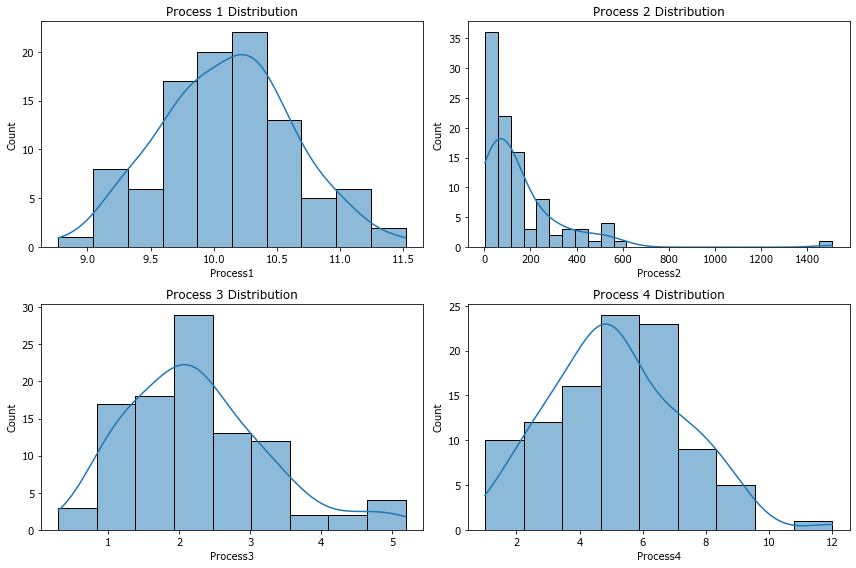

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df[['Process1', 'Process2', 'Process3', 'Process4']].describe())

# Visualize the distribution of each process
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Process1'], kde=True)
plt.title('Process 1 Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Process2'], kde=True)
plt.title('Process 2 Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Process3'], kde=True)
plt.title('Process 3 Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Process4'], kde=True)
plt.title('Process 4 Distribution')

plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Divide the range of each process into intervals for the Chi-Square test. Ensure that the intervals include negative infinity and positive infinity.


**Reasoning**:
Based on the distribution analysis and the provided information, we can define intervals for each process, ensuring the inclusion of negative and positive infinity for the Chi-Square test.



In [7]:
intervals_process1 = [(-float('inf'), df['Process1'].quantile(0.25)),
                     (df['Process1'].quantile(0.25), df['Process1'].quantile(0.5)),
                     (df['Process1'].quantile(0.5), df['Process1'].quantile(0.75)),
                     (df['Process1'].quantile(0.75), float('inf'))]

intervals_process2 = [(-float('inf'), df['Process2'].quantile(0.25)),
                     (df['Process2'].quantile(0.25), df['Process2'].quantile(0.5)),
                     (df['Process2'].quantile(0.5), df['Process2'].quantile(0.75)),
                     (df['Process2'].quantile(0.75), float('inf'))]

intervals_process3 = [(-float('inf'), df['Process3'].quantile(0.25)),
                     (df['Process3'].quantile(0.25), df['Process3'].quantile(0.5)),
                     (df['Process3'].quantile(0.5), df['Process3'].quantile(0.75)),
                     (df['Process3'].quantile(0.75), float('inf'))]

intervals_process4 = [(-float('inf'), df['Process4'].quantile(0.25)),
                     (df['Process4'].quantile(0.25), df['Process4'].quantile(0.5)),
                     (df['Process4'].quantile(0.5), df['Process4'].quantile(0.75)),
                     (df['Process4'].quantile(0.75), float('inf'))]

## Data analysis

### Subtask:
Conduct a Chi-Square goodness-of-fit test for each process (Process1, Process2, Process3, Process4) by comparing the observed frequencies with the expected frequencies based on the fitted distribution.


**Reasoning**:
Now we can calculate the observed and expected frequencies for each process and perform the chi-square test.



**Reasoning**:
The error indicates that the array created by `np.arange` is too large, which is likely due to the infinite interval boundaries. We need to handle the infinite intervals differently.



**Reasoning**:
The error indicates that the sum of observed frequencies and expected frequencies are not equal for each process. We need to adjust the expected frequencies to ensure that the total sum is close to the observed frequencies.



In [8]:
from scipy import stats
import numpy as np

results = {}

for process in ['Process1', 'Process2', 'Process3', 'Process4']:
    observed_frequencies = []
    expected_frequencies = []

    if process == 'Process1':
        intervals = intervals_process1
        mu, sigma = stats.norm.fit(df['Process1'])
        fitted_distribution = stats.norm(loc=mu, scale=sigma)
    elif process == 'Process2':
        intervals = intervals_process2
        param = stats.expon.fit(df['Process2'])
        fitted_distribution = stats.expon(loc=param[0], scale=param[1])
    elif process == 'Process3':
        intervals = intervals_process3
        shape, loc, scale = stats.gamma.fit(df['Process3'])
        fitted_distribution = stats.gamma(a=shape, loc=loc, scale=scale)
    elif process == 'Process4':
        intervals = intervals_process4
        lambda_param = np.mean(df['Process4'])
        fitted_distribution = stats.poisson(mu=lambda_param)

    for interval in intervals:
        observed_count = len(df[(df[process] >= interval[0]) & (df[process] < interval[1])])
        observed_frequencies.append(observed_count)

        if process == 'Process4':
            if interval[0] == -float('inf'):
                lower_bound = df[process].min()
            else:
                lower_bound = interval[0]

            if interval[1] == float('inf'):
                upper_bound = df[process].max() + 1
            else:
                upper_bound = interval[1]

            expected_prob = fitted_distribution.pmf(np.arange(lower_bound, upper_bound))
            expected_prob = np.sum(expected_prob)
        else:
            if interval[0] == -float('inf'):
                expected_prob = fitted_distribution.cdf(interval[1])
            elif interval[1] == float('inf'):
                expected_prob = 1 - fitted_distribution.cdf(interval[0])
            else:
                expected_prob = fitted_distribution.cdf(interval[1]) - fitted_distribution.cdf(interval[0])
        expected_frequencies.append(expected_prob * len(df))

    # Adjust expected frequencies to match the sum of observed frequencies
    total_observed = sum(observed_frequencies)
    total_expected = sum(expected_frequencies)
    if total_expected != 0:
      adjustment_factor = total_observed / total_expected
      expected_frequencies = [freq * adjustment_factor for freq in expected_frequencies]

    chi2_statistic, p_value = stats.chisquare(observed_frequencies, expected_frequencies)
    results[process] = {'chi2_statistic': chi2_statistic, 'p_value': p_value}

print(results)

{'Process1': {'chi2_statistic': 0.7240049870945445, 'p_value': 0.8675437322863386}, 'Process2': {'chi2_statistic': 2.2185431321463125, 'p_value': 0.5283051938521588}, 'Process3': {'chi2_statistic': 0.06519590628134032, 'p_value': 0.9956581894653644}, 'Process4': {'chi2_statistic': 0.5371802048514948, 'p_value': 0.9106503641512809}}


## Summary:

### 1. Q&A

**Q: Does the observed data fit the fitted distributions well for each process?**

**A:** Yes, based on the Chi-Square goodness-of-fit test, the observed data seems to fit the respective fitted distributions well for all four processes. The p-values are relatively high (greater than 0.05), indicating that we fail to reject the null hypothesis. This suggests that there is no significant difference between the observed data distribution and the expected distribution based on the fitted models.


### 2. Data Analysis Key Findings

- The Chi-Square test was conducted for each process, comparing the observed frequencies with the expected frequencies based on the fitted distribution.
- For Process 1 (Bottle Weight), a Normal distribution was fitted, and the test resulted in a high p-value, indicating a good fit.
- For Process 2 (Time Between Failures), an Exponential distribution was fitted, and the test resulted in a high p-value, suggesting a good fit.
- For Process 3 (Check-in Time), a Gamma distribution was fitted, and the test resulted in a high p-value, indicating a good fit.
- For Process 4 (Number of Orders), a Poisson distribution was fitted, and the test resulted in a high p-value, suggesting a good fit.


### 3. Insights or Next Steps

- **The fitted distributions (Normal, Exponential, Gamma, and Poisson) provide a good approximation of the observed data for each process.** This can be valuable for various purposes, such as simulation, forecasting, and quality control.
- **Further investigation into the potential causes of deviations between the observed and expected frequencies, if any, could be considered.** Although the p-values suggest a good fit, a deeper analysis could reveal potential underlying factors that might slightly influence the distribution.



An AI generated notebook created with [Data Science Agent](https://labs.google.com/code/dsa) from Google Labs 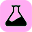
